
<table align="center" width=100%>
    <tr>
        </td>
            </td>
        </td>
        <td>
            <div align="center">
                <font color="#e06660" size=8px>
                    <b> MOVIE RATING PREDICTION WITH PYTHON
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [1]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

plt.style.use("fivethirtyeight")
%matplotlib inline

# import train-test split 
from sklearn.model_selection import train_test_split

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 

#Model Selection:
from sklearn.linear_model import LinearRegression

#from sklearn.metrics import accuracy_score, r2_score, recall_score, confusion_matrix
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import cross_val_score
from sklearn import svm


**Import Data-Set**

In [2]:
movie=pd.read_csv("IMDb Movies India.csv" ,  encoding='latin-1')

In [3]:
movie.head()

Name    Year Duration            Genre  \
0                                         NaN      NaN            Drama   
1  #Gadhvi (He thought he was Gandhi)  (2019)  109 min            Drama   
2                         #Homecoming  (2021)   90 min   Drama, Musical   
3                             #Yaaram  (2019)  110 min  Comedy, Romance   
4                   ...And Once Again  (2010)  105 min            Drama   

    Rating Votes            Director       Actor 1             Actor 2  \
0      NaN   NaN       J.S. Randhawa      Manmauji              Birbal   
1 7.000000     8       Gaurav Bakshi  Rasika Dugal      Vivek Ghamande   
2      NaN   NaN  Soumyajit Majumdar  Sayani Gupta   Plabita Borthakur   
3 4.400000    35          Ovais Khan       Prateik          Ishita Raj   
4      NaN   NaN        Amol Palekar  Rajat Kapoor  Rituparna Sengupta   

           Actor 3  
0  Rajendra Bhatia  
1    Arvind Jangid  
2       Roy Angana  
3  Siddhant Kapoor  
4      Antara Mali

In [4]:
movie.tail()




Name    Year Duration          Genre   Rating Votes  \
15504  Zulm Ko Jala Doonga  (1988)      NaN         Action 4.600000    11   
15505                Zulmi  (1999)  129 min  Action, Drama 4.500000   655   
15506            Zulmi Raj  (2005)      NaN         Action      NaN   NaN   
15507        Zulmi Shikari  (1988)      NaN         Action      NaN   NaN   
15508         Zulm-O-Sitam  (1998)  130 min  Action, Drama 6.200000    20   

            Director           Actor 1         Actor 2        Actor 3  
15504  Mahendra Shah  Naseeruddin Shah   Sumeet Saigal  Suparna Anand  
15505     Kuku Kohli      Akshay Kumar  Twinkle Khanna    Aruna Irani  
15506     Kiran Thej   Sangeeta Tiwari             NaN            NaN  
15507            NaN               NaN             NaN            NaN  
15508   K.C. Bokadia        Dharmendra      Jaya Prada    Arjun Sarja

In [5]:
movie.describe()

Rating
count 7919.000000
mean     5.841621
std      1.381777
min      1.100000
25%      4.900000
50%      6.000000
75%      6.800000
max     10.000000

In [6]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


**Null-value Treatment**

In [7]:
movie.isnull().sum()/len(movie)*100

Name        0.000000
Year        3.404475
Duration   53.317429
Genre      12.102650
Rating     48.939326
Votes      48.932878
Director    3.385131
Actor 1    10.426204
Actor 2    15.371720
Actor 3    20.272100
dtype: float64

- The Rating Column is our target variable.
- Hence we cannot drop this whole column, but we can drop the rows containing null values.

In [8]:
movie.dropna(subset=['Rating'],inplace=True)

In [9]:
movie.isnull().sum()/len(movie)*100

Name        0.000000
Year        0.000000
Duration   26.114408
Genre       1.288041
Rating      0.000000
Votes       0.000000
Director    0.063139
Actor 1     1.578482
Actor 2     2.525571
Actor 3     3.687334
dtype: float64

- For the columns with less than 10% of null value we will remove the rows that contain null values.

In [10]:
movie.dropna(subset=['Actor 1','Actor 2','Actor 3','Director','Genre'],inplace=True)

In [11]:
movie.isnull().sum()/len(movie)*100

Name        0.000000
Year        0.000000
Duration   25.125695
Genre       0.000000
Rating      0.000000
Votes       0.000000
Director    0.000000
Actor 1     0.000000
Actor 2     0.000000
Actor 3     0.000000
dtype: float64

**For the duration column we will impute the null value**

In [12]:
movie.Duration.value_counts()

120 min    169
135 min    147
130 min    141
150 min    133
140 min    133
137 min    120
145 min    116
136 min    113
138 min    111
139 min    105
125 min    102
155 min     92
134 min     90
128 min     88
160 min     86
127 min     85
133 min     85
142 min     83
132 min     82
110 min     81
146 min     80
126 min     79
144 min     78
153 min     77
122 min     77
148 min     75
152 min     73
143 min     71
131 min     70
129 min     70
141 min     68
149 min     65
100 min     64
124 min     63
117 min     61
123 min     59
151 min     58
115 min     57
156 min     57
154 min     56
90 min      55
158 min     53
165 min     53
162 min     52
121 min     52
157 min     51
119 min     51
105 min     49
112 min     47
147 min     47
113 min     46
164 min     45
109 min     45
116 min     44
95 min      44
118 min     44
108 min     44
114 min     43
107 min     43
161 min     43
180 min     43
106 min     42
159 min     41
104 min     41
170 min     39
163 min     37
102 min   

- First lets convert the Duration into a numerical columns.

In [13]:
movie.Duration=movie.Duration.str.replace("min", " ")

In [14]:
movie.Duration=movie.Duration.astype("float64")

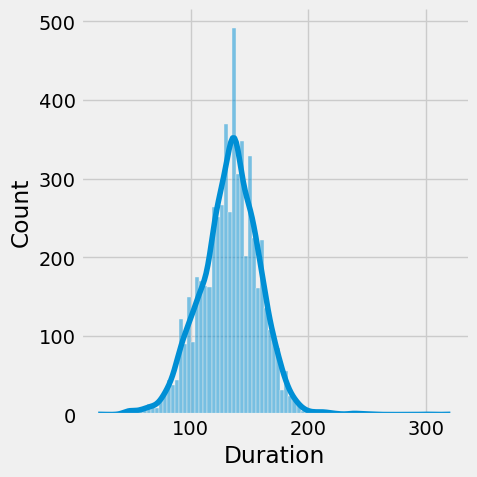

In [15]:
sns.displot(movie["Duration"], kde=True)

- The distribution is normal hence we can fill the null values with the mean of duration.

In [16]:
movie.Duration.mean()

133.43912352005654

In [17]:
movie.Duration.fillna(round(movie.Duration.mean()), inplace=True)

In [18]:
movie.isnull().sum()/len(movie)*100

Name       0.000000
Year       0.000000
Duration   0.000000
Genre      0.000000
Rating     0.000000
Votes      0.000000
Director   0.000000
Actor 1    0.000000
Actor 2    0.000000
Actor 3    0.000000
dtype: float64

**Duplicates**

In [19]:
movie.duplicated().sum()

0

In [20]:
movie.head()

Name    Year   Duration  \
1  #Gadhvi (He thought he was Gandhi)  (2019) 109.000000   
3                             #Yaaram  (2019) 110.000000   
5                ...Aur Pyaar Ho Gaya  (1997) 147.000000   
6                           ...Yahaan  (2005) 142.000000   
8                  ?: A Question Mark  (2012)  82.000000   

                       Genre   Rating  Votes        Director          Actor 1  \
1                      Drama 7.000000      8   Gaurav Bakshi     Rasika Dugal   
3            Comedy, Romance 4.400000     35      Ovais Khan          Prateik   
5     Comedy, Drama, Musical 4.700000    827    Rahul Rawail       Bobby Deol   
6        Drama, Romance, War 7.400000  1,086  Shoojit Sircar  Jimmy Sheirgill   
8  Horror, Mystery, Thriller 5.600000    326   Allyson Patel        Yash Dave   

                  Actor 2          Actor 3  
1          Vivek Ghamande    Arvind Jangid  
3              Ishita Raj  Siddhant Kapoor  
5  Aishwarya Rai Bachchan    Shammi Kapoor  
6          Minissha Lamba   Yashpal Sharma  
8          Muntazir Ahmad     Kiran Bhatia

- We will replace the value of Year column from (2019) to 2019.


In [21]:
movie.Year=movie.Year.str.replace("(", " ")
movie.Year=movie.Year.str.replace(")", " ")
movie.head()

Name    Year   Duration  \
1  #Gadhvi (He thought he was Gandhi)   2019  109.000000   
3                             #Yaaram   2019  110.000000   
5                ...Aur Pyaar Ho Gaya   1997  147.000000   
6                           ...Yahaan   2005  142.000000   
8                  ?: A Question Mark   2012   82.000000   

                       Genre   Rating  Votes        Director          Actor 1  \
1                      Drama 7.000000      8   Gaurav Bakshi     Rasika Dugal   
3            Comedy, Romance 4.400000     35      Ovais Khan          Prateik   
5     Comedy, Drama, Musical 4.700000    827    Rahul Rawail       Bobby Deol   
6        Drama, Romance, War 7.400000  1,086  Shoojit Sircar  Jimmy Sheirgill   
8  Horror, Mystery, Thriller 5.600000    326   Allyson Patel        Yash Dave   

                  Actor 2          Actor 3  
1          Vivek Ghamande    Arvind Jangid  
3              Ishita Raj  Siddhant Kapoor  
5  Aishwarya Rai Bachchan    Shammi Kapoor  
6          Minissha Lamba   Yashpal Sharma  
8          Muntazir Ahmad     Kiran Bhatia

In [22]:
movie.Year=movie.Year.astype("int64")

- The dataset does not have any duplicates.

**Votes**

In [23]:
movie.Votes=movie.Votes.str.replace(",","").astype("float64")

#### EDA

In [24]:
top_10_movies = movie.loc[movie['Rating'].sort_values(ascending=False)[:10].index]
top_10_movies

Name  Year   Duration                   Genre    Rating  \
8339       Love Qubool Hai  2020  94.000000          Drama, Romance 10.000000   
5410            Half Songs  2021  79.000000          Music, Romance  9.700000   
2563                 Breed  2020 133.000000                   Drama  9.600000   
14222  The Reluctant Crime  2020 113.000000                   Drama  9.400000   
5077          Gho Gho Rani  2019 105.000000        History, Romance  9.400000   
6852                  June  2021  93.000000                   Drama  9.400000   
12673   Secrets of Sinauli  2021  56.000000    Documentary, History  9.300000   
5125           God of gods  2019  90.000000             Documentary  9.300000   
8344          Love Sorries  2021 101.000000  Comedy, Drama, Romance  9.300000   
1314          Ashok Vatika  2018  97.000000                   Drama  9.300000   

            Votes         Director            Actor 1          Actor 2  \
8339     5.000000  Saif Ali Sayeed          Ahaan Jha   Mahesh Narayan   
5410     7.000000      Sriram Raja       Raj Banerjee  Emon Chatterjee   
2563    48.000000      Bobby Kumar        Bobby Kumar           Ashfaq   
14222   16.000000    Arvind Pratap    Dharmendra Ahir   Awanish Kotnal   
5077    47.000000     Munni Pankaj  Nishi Neha Mishra     Pankaj Kamal   
6852    18.000000   Suhrud Godbole     Vaibhav Khisti   Nilesh Divekar   
12673 1373.000000   Raghav Jairath     Manoj Bajpayee       R.S. Bhist   
5125    46.000000     Venkatesh Bk  Tejaswini Manogna    Triyug Mantri   
8344    79.000000     Gautam Joshi   Prashant Chaubey  Puneet Chouksey   
1314     7.000000    Rahul Mallick         Kunj Anand   Sanjay Bishnoi   

                   Actor 3  
8339   Rajasree Rajakumari  
5410     Purshottam Mulani  
2563        Fasih Choudhry  
14222         Rakhi Mansha  
5077           Akash Kumar  
6852        Jitendra Joshi  
12673           K.N. Dixit  
5125       Raj Singh Verma  
8344         Amitabh Gupta  
1314          Paras Zutshi

Text(0.5, 1.0, 'Top 10 Movie Ratings')

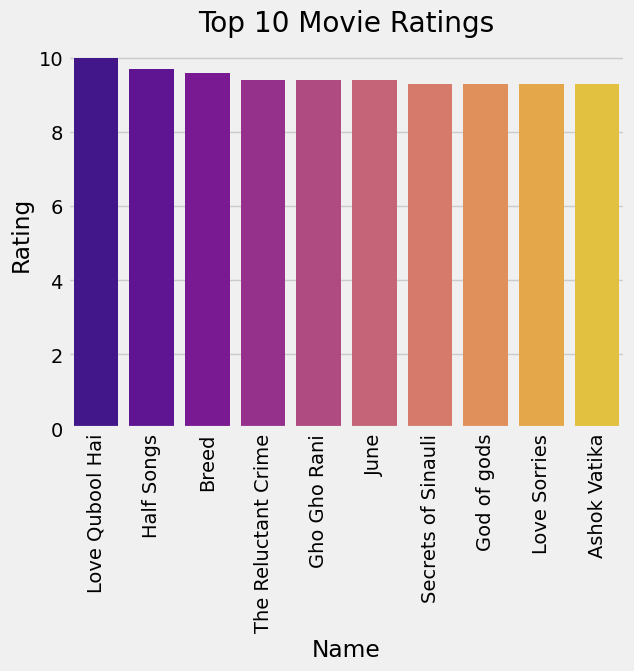

In [25]:
sns.barplot(data=top_10_movies, x="Name", y="Rating", palette="plasma")
plt.xticks(rotation=90)
plt.title("Top 10 Movie Ratings")

**Ratings over the Years**

In [26]:
movie.shape

(7558, 10)

In [27]:
 #Group by 'Year' and calculate the mean of 'Rating'
average_ratings_by_year = movie.groupby('Year')['Rating'].mean()
average_ratings_by_year


Year
1917   6.700000
1931   5.900000
1932   5.750000
1933   5.550000
1934   5.600000
1935   5.500000
1936   5.885714
1937   6.033333
1938   6.557143
1939   5.975000
1940   7.050000
1941   6.533333
1942   6.614286
1943   6.762500
1944   5.981818
1945   6.071429
1946   6.300000
1947   6.353333
1948   7.135294
1949   6.826087
1950   7.031034
1951   6.683871
1952   6.937500
1953   6.820690
1954   6.362857
1955   6.794595
1956   6.357500
1957   6.780392
1958   6.412500
1959   6.437778
1960   6.447059
1961   6.410204
1962   6.333333
1963   6.360870
1964   6.410169
1965   6.552941
1966   6.455556
1967   6.570588
1968   6.520690
1969   6.374603
1970   6.447059
1971   6.448148
1972   6.219101
1973   6.275309
1974   6.571264
1975   6.394872
1976   6.447692
1977   6.229167
1978   6.338272
1979   6.329348
1980   6.062245
1981   6.239216
1982   6.094017
1983   6.208791
1984   5.970940
1985   6.009600
1986   5.940171
1987   5.661538
1988   5.581481
1989   5.344203
1990   5.191667
1991   5.127612
199

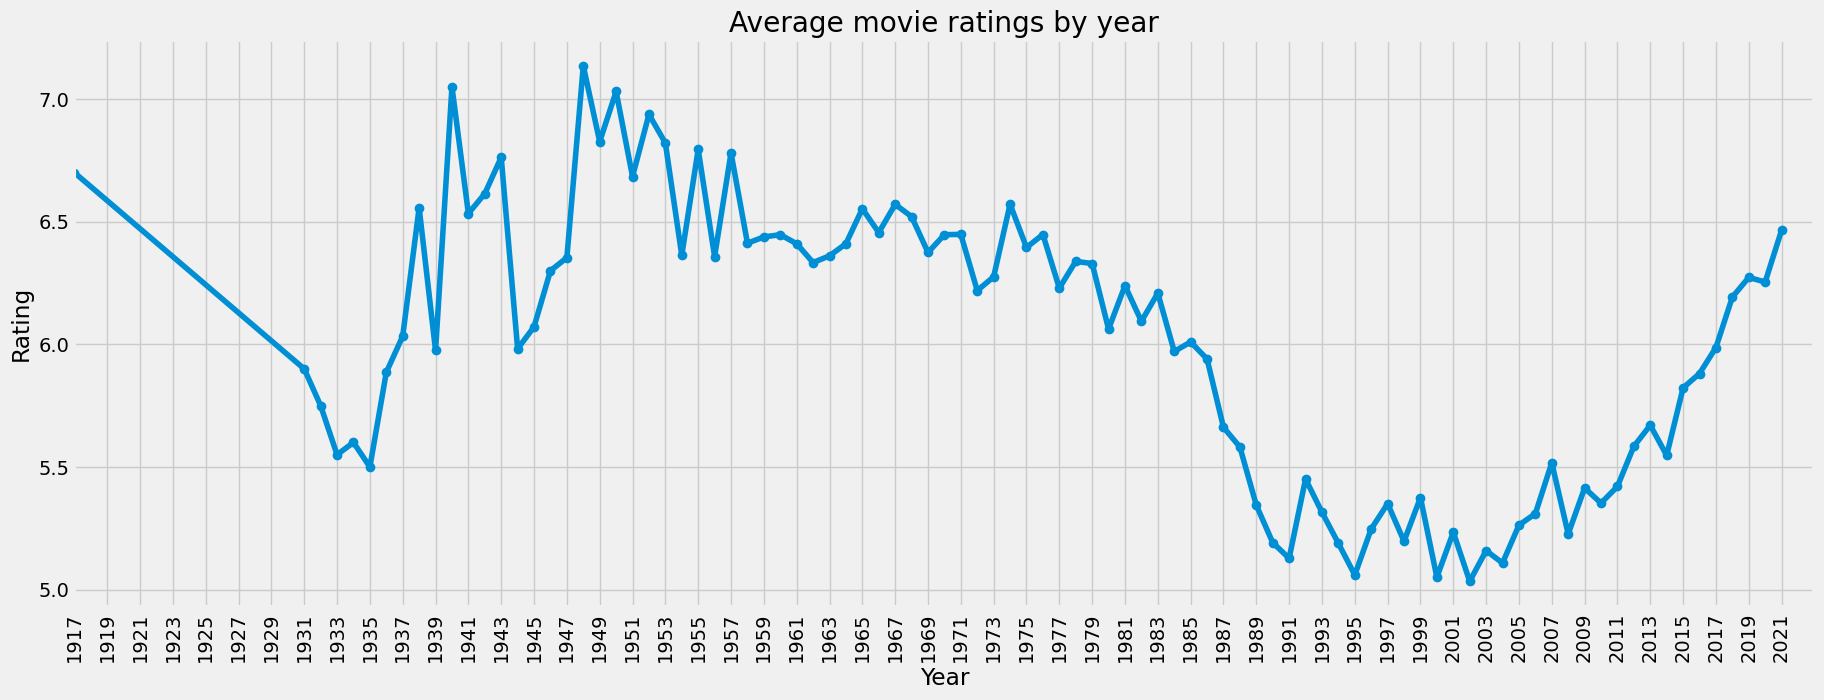

In [28]:
#Plot
plt.figure(figsize=(20, 7))
average_ratings_by_year.plot(marker="o")
plt.xlabel('Year')
plt.ylabel('Rating')
plt.title('Average movie ratings by year')
plt.xticks(np.arange(1917, 2023, 2), rotation=90)
plt.xlim(1917, 2023)

plt.show()

- The highest average was in the year 1940
- From the year 1981 there was an decrease in movie rating and 2002 was recorded as lowest
- After 2008 there was a rise in average rating.

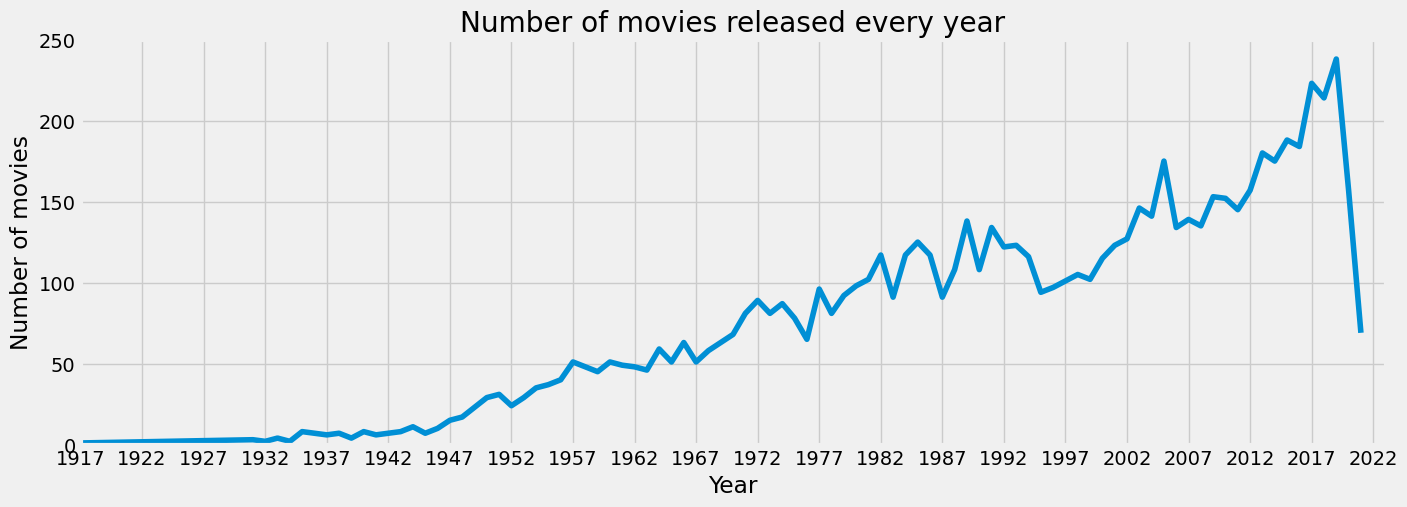

In [29]:
movie.groupby(['Year'])['Name'].count().plot(figsize=(15,5))
plt.xlabel('Year')
plt.ylabel('Number of movies')
plt.title('Number of movies released every year')
plt.ylim(0,250)
plt.xlim(1917,2023)
plt.xticks(np.arange(1917,2023,5))
plt.show()

- The number of movies releasing has increased over the years.

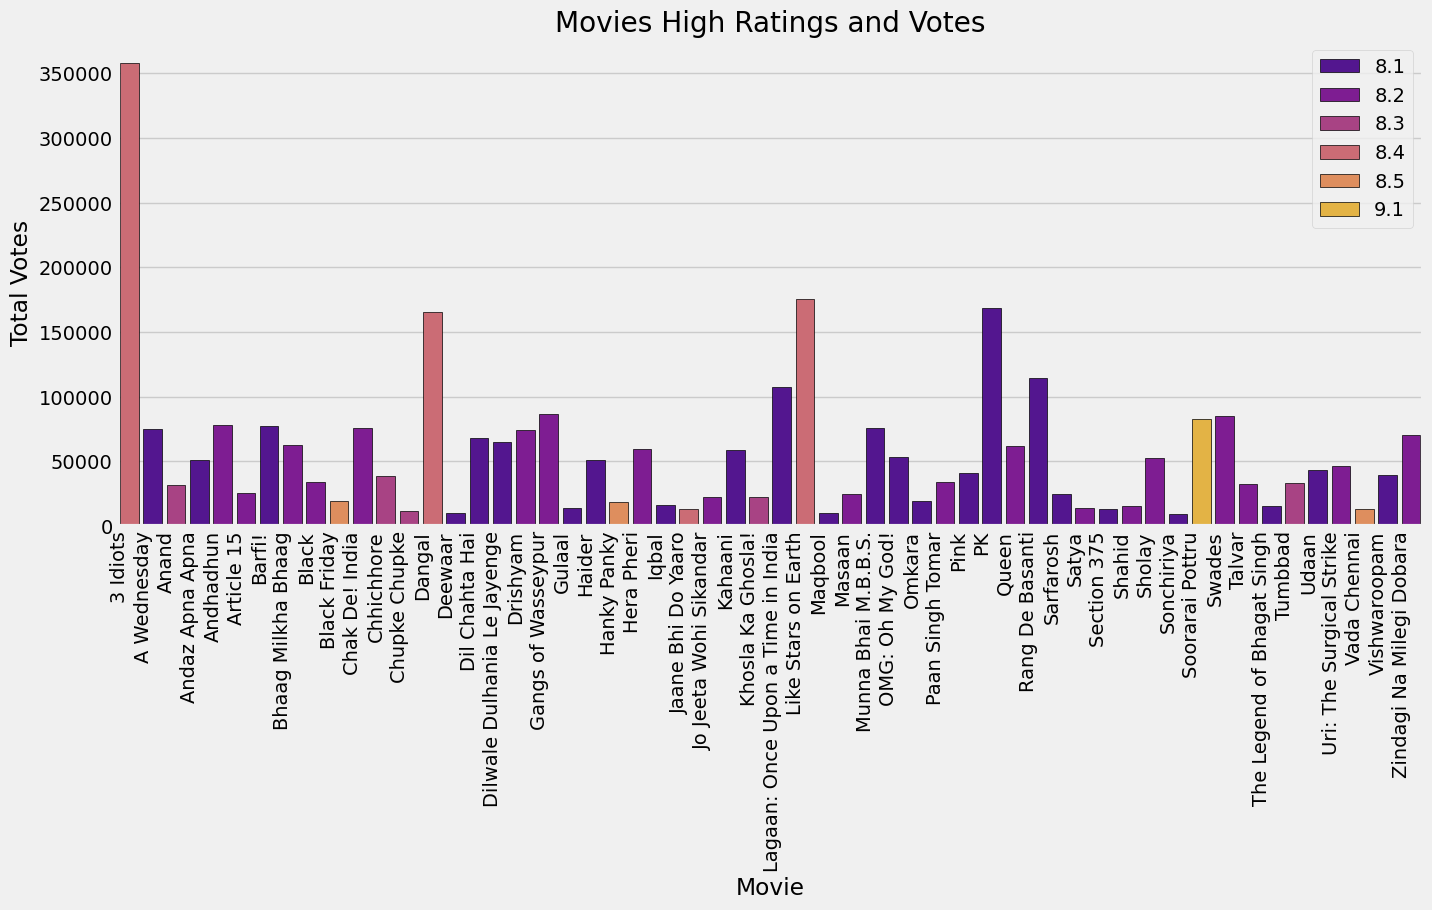

In [30]:
d = movie.loc[(movie['Rating']>8) & (movie['Votes']>9000), ['Rating','Votes','Name']]
plt.figure(figsize=(15, 6))
ax=sns.barplot(data=d,x='Name',y='Votes',hue='Rating',dodge=False,palette='plasma', edgecolor="black")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')
ax.legend(loc='best')
ax.set_xlabel('Movie')
ax.set_ylabel('Total Votes')
ax.set_title('Movies High Ratings and Votes')
plt.show()

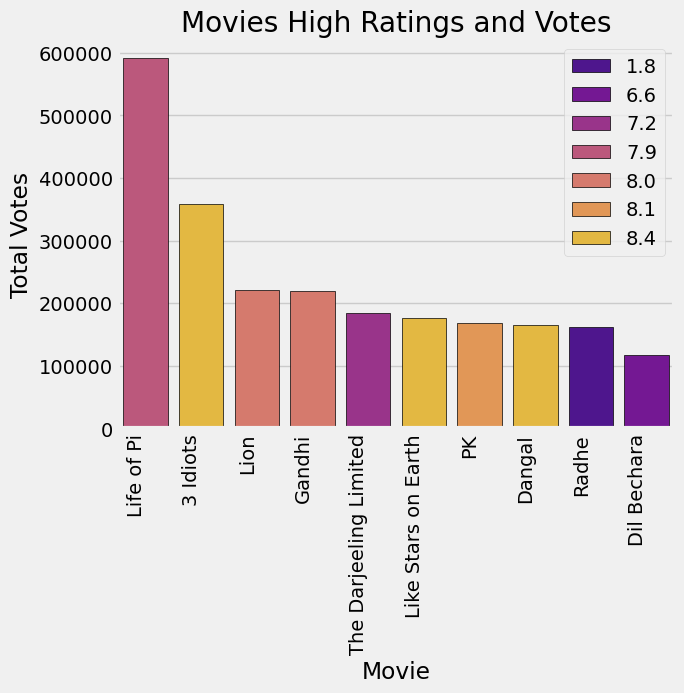

In [31]:
ratings_votes=movie[["Rating", "Votes", "Name"]].sort_values(["Votes", "Rating"], ascending=False)[:10]
ax=sns.barplot(data=ratings_votes,x='Name',y='Votes',hue='Rating',dodge=False,palette='plasma', edgecolor="black")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')
ax.legend(loc='best')
ax.set_xlabel('Movie')
ax.set_ylabel('Total Votes')
ax.set_title('Movies High Ratings and Votes')
plt.show()

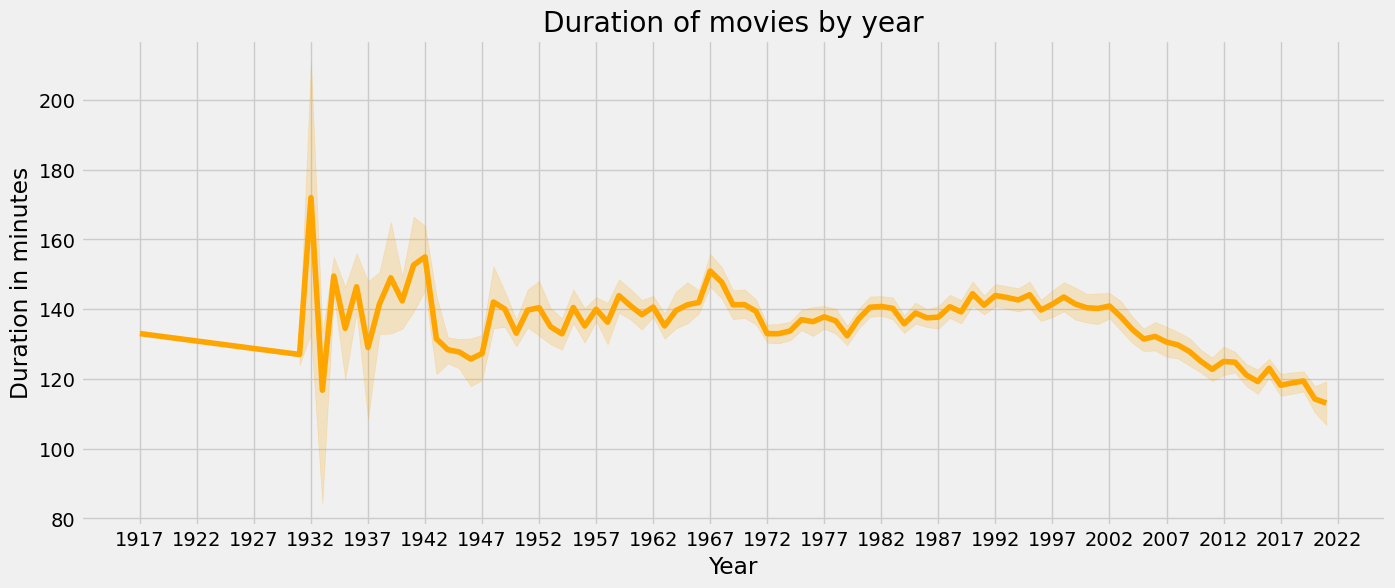

In [32]:
plt.figure(figsize=(15, 6))
sns.lineplot(data=movie,x='Year',y='Duration', color="orange")
plt.xlabel('Year')
plt.ylabel('Duration in minutes')
plt.title('Duration of movies by year')
plt.xticks(np.arange(1917,2023,5))
plt.show()

Text(0.5, 1.0, 'Duration of movies by year')

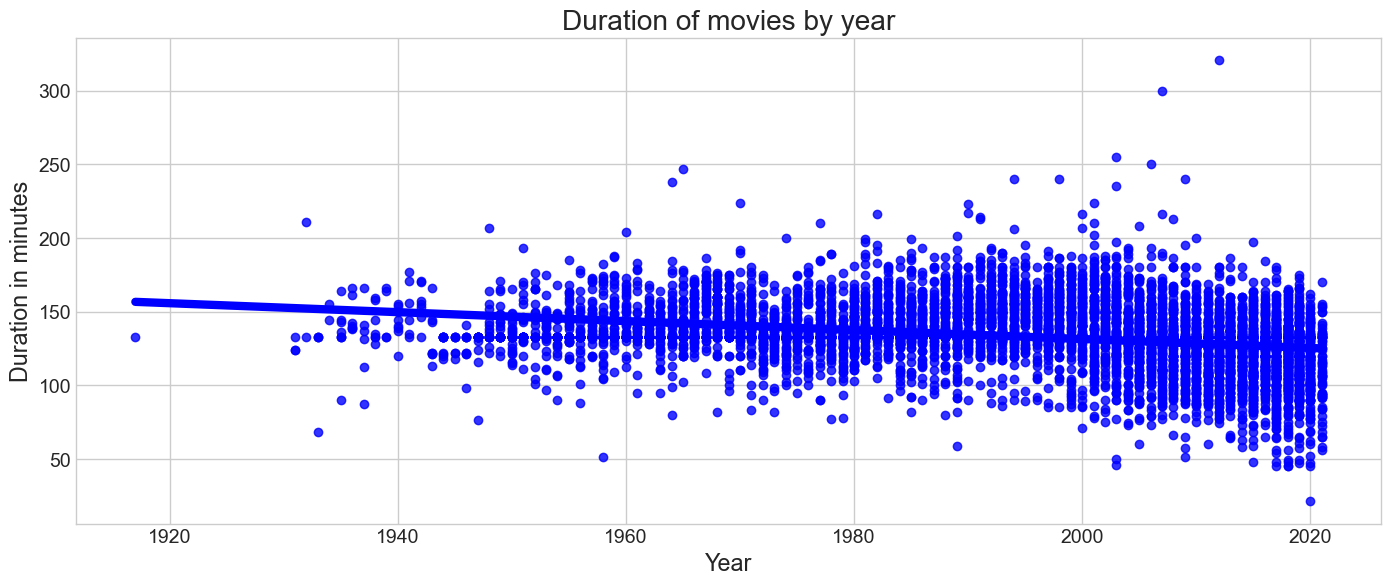

In [33]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(15, 6))
sns.regplot(data=movie,x='Year',y='Duration', color="blue", )
plt.xlabel('Year')
plt.ylabel('Duration in minutes')
plt.title('Duration of movies by year')

- The Duration of the movies decreased over the years

In [34]:
movie.Genre.nunique()

416

In [35]:
genre = movie['Genre']
genre_list = genre.str.split(',').apply(pd.Series).stack()
genre_list.index = genre_list.index.droplevel(-1)
genre1=[genre.str.split(',').apply(pd.Series)[i].str.strip().value_counts(dropna=False).to_dict() for i in range(3)]

g_dict = {k: sum(dic.get(k,0) for dic in genre1) for dic in genre1 for k in dic}
genres_count = pd.Series(g_dict).sort_values(ascending=False).drop(np.nan)

genre_rating =pd.Series({k:movie.loc[movie['Genre'].str.contains(k),'Rating'].mean() for k in genres_count.index})

genres_single = pd.concat([genres_count,genre_rating],axis=1).sort_values(by=1,ascending=False).rename(columns={0:'Movie_Count',1:'Average rating'})


In [36]:
print(genre_rating)
print(genres_single)

Drama         5.988834
Action        5.426121
Romance       5.747312
Comedy        5.728150
Crime         5.722313
Thriller      5.531170
Family        6.172657
Musical       6.160772
Adventure     5.825668
Mystery       5.792350
Horror        4.764835
Fantasy       5.819307
Biography     6.717188
History       6.804167
Music         6.150092
Documentary   7.587755
Sport         6.380851
Animation     5.960000
Sci-Fi        5.270588
War           5.981818
Western       5.250000
News          8.000000
dtype: float64
             Movie_Count  Average rating
News                   1        8.000000
Documentary           49        7.587755
History              120        6.804167
Biography            128        6.717188
Sport                 47        6.380851
Family               651        6.172657
Musical              492        6.160772
Music                 57        6.150092
Drama               4854        5.988834
War                   33        5.981818
Animation             45    

In [37]:
plt.style.use('fivethirtyeight')

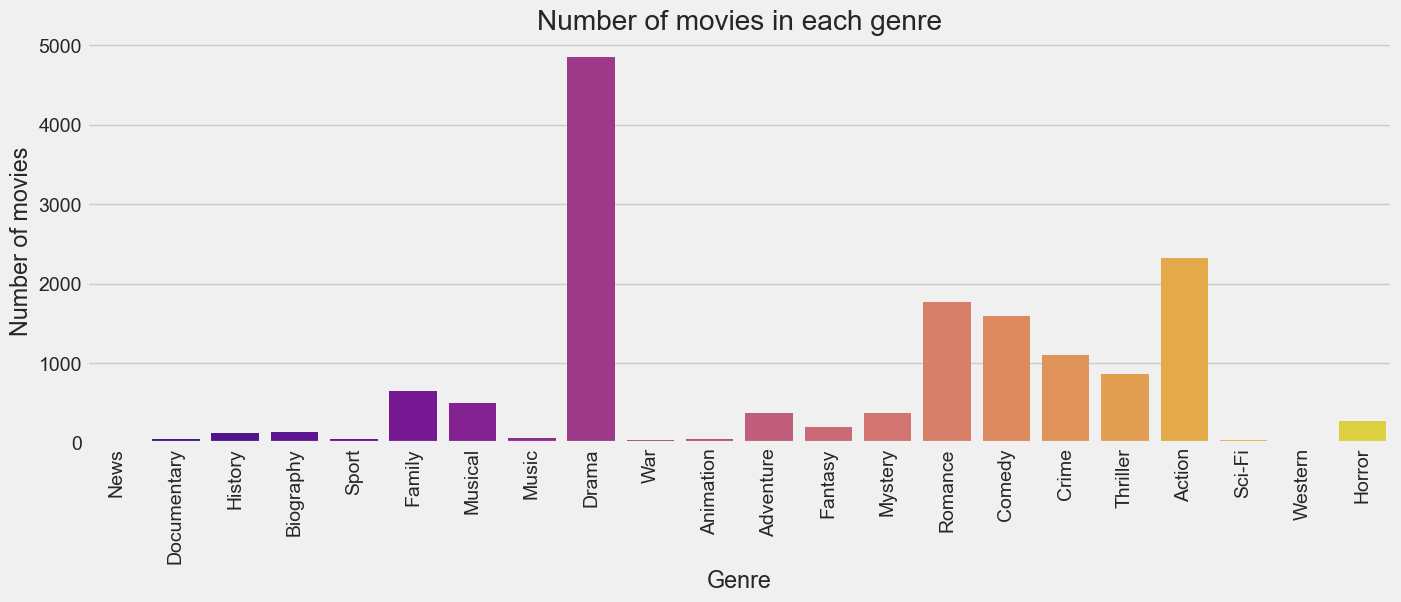

In [38]:
plt.figure(figsize=(15,5))
sns.barplot(data=genres_single,x=genres_single.index.values,y='Movie_Count',palette='plasma')
plt.xlabel('Genre')
plt.ylabel('Number of movies')
plt.title('Number of movies in each genre')
plt.xticks(rotation=90)
plt.show()

**Director**

In [39]:
directors_rating=movie.groupby(by="Director").agg(["mean", "count"])["Rating"].reset_index()
directors_rating.rename(columns={ "mean":"Average_Rating", "count": "Total_Movie_Count"}, inplace=True )
directors_rating.sort_values(by="Total_Movie_Count", ascending=False, inplace=True)
top_20_directors=directors_rating[:20]
top_20_directors

Director  Average_Rating  Total_Movie_Count
1336                Mahesh Bhatt        5.515556                 45
586                 David Dhawan        5.193023                 43
899         Hrishikesh Mukherjee        7.102381                 42
2408              Shakti Samanta        6.623684                 38
1155                  Kanti Shah        4.921622                 37
442              Basu Chatterjee        6.644118                 34
2029           Rama Rao Tatineni        5.379412                 34
2015             Ram Gopal Varma        5.596970                 33
2461                 Shibu Mitra        5.175758                 33
2855                Vikram Bhatt        4.833333                 33
1894                Raj N. Sippy        5.131250                 32
1802                Priyadarshan        6.190323                 31
1071                  K. Bapaiah        5.277419                 31
856             Harmesh Malhotra        5.537931                 29
1080          K. Raghavendra Rao        5.627586                 29
2697               T.L.V. Prasad        4.465517                 29
1888                  Raj Khosla        6.446154                 26
2366                 Satyen Bose        6.708000                 25
2508                Shyam Ramsay        5.436000                 25
2424  Shantaram Rajaram Vankudre        6.450000                 24

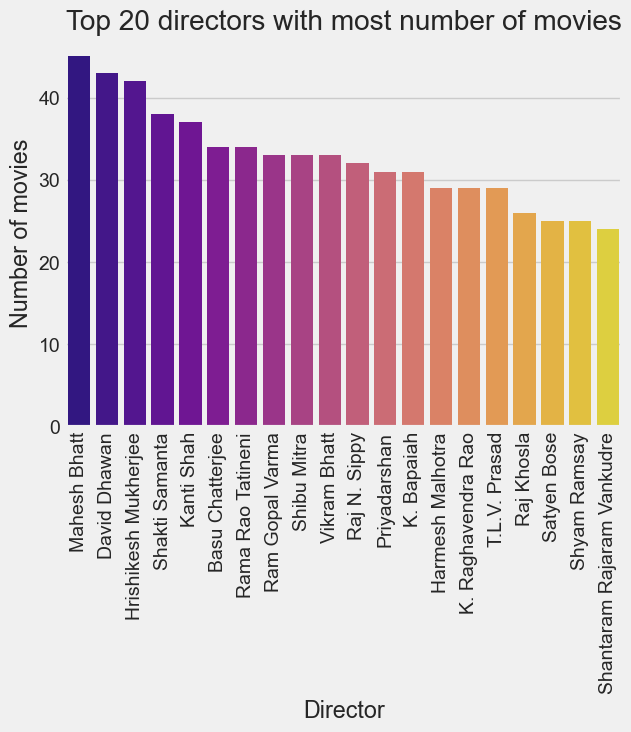

In [40]:
sns.barplot(data=top_20_directors, x="Director", y="Total_Movie_Count", palette="plasma")
plt.xlabel('Director')
plt.ylabel('Number of movies')
plt.xticks(rotation=90)
plt.title('Top 20 directors with most number of movies')
plt.show()

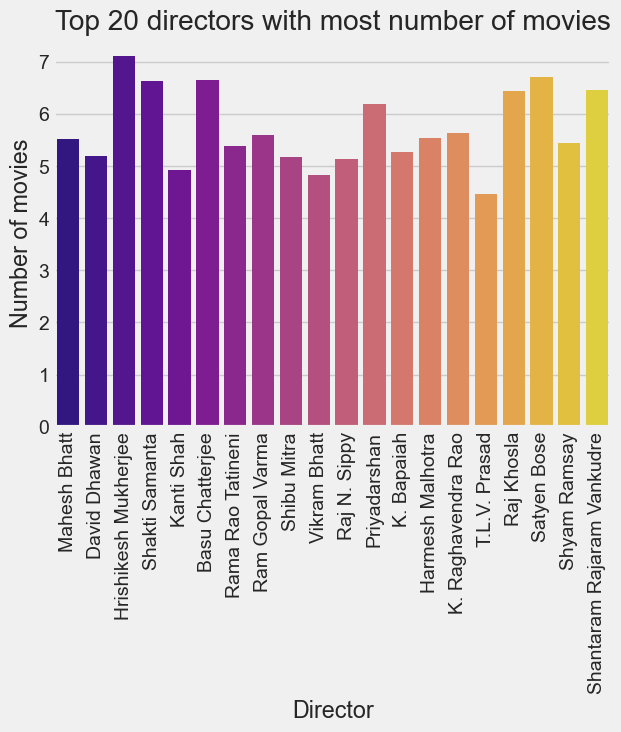

In [41]:
sns.barplot(data=top_20_directors, x="Director", y="Average_Rating", palette="plasma")
plt.xlabel('Director')
plt.ylabel('Number of movies')
plt.xticks(rotation=90)
plt.title('Top 20 directors with most number of movies')
plt.show()

**Names**

In [42]:
movie[movie.Name=="Zindagi"]

Name  Year   Duration                   Genre   Rating     Votes  \
15456  Zindagi  1964 157.000000  Musical, Drama, Family 6.500000 50.000000   
15457  Zindagi  1940 120.000000                   Drama 7.000000 12.000000   
15458  Zindagi  1976 139.000000          Drama, Romance 6.800000 26.000000   
15460  Zindagi  2000 118.000000                 Romance 2.800000  8.000000   

             Director         Actor 1        Actor 2              Actor 3  
15456  Ramanand Sagar  Rajendra Kumar     Raaj Kumar       Vyjayanthimala  
15457      P.C. Barua     K.L. Saigal  Pahadi Sanyal  Ashalata Wabgaonkar  
15458     Ravi Tandon      Mala Sinha  Sanjeev Kumar          Vinod Mehra  
15460   Suraj Prakash    Vicky Bhalla        Gayatri         Deepak Jethi

- We can drop the "Name" column as it represents the charateristics of a Unique column.


In [43]:
movie.drop(columns="Name", inplace=True)

**Data Pre-Processing**

In [44]:
num_columns = list(movie.select_dtypes(include=np.number).columns)
len(num_columns)

4

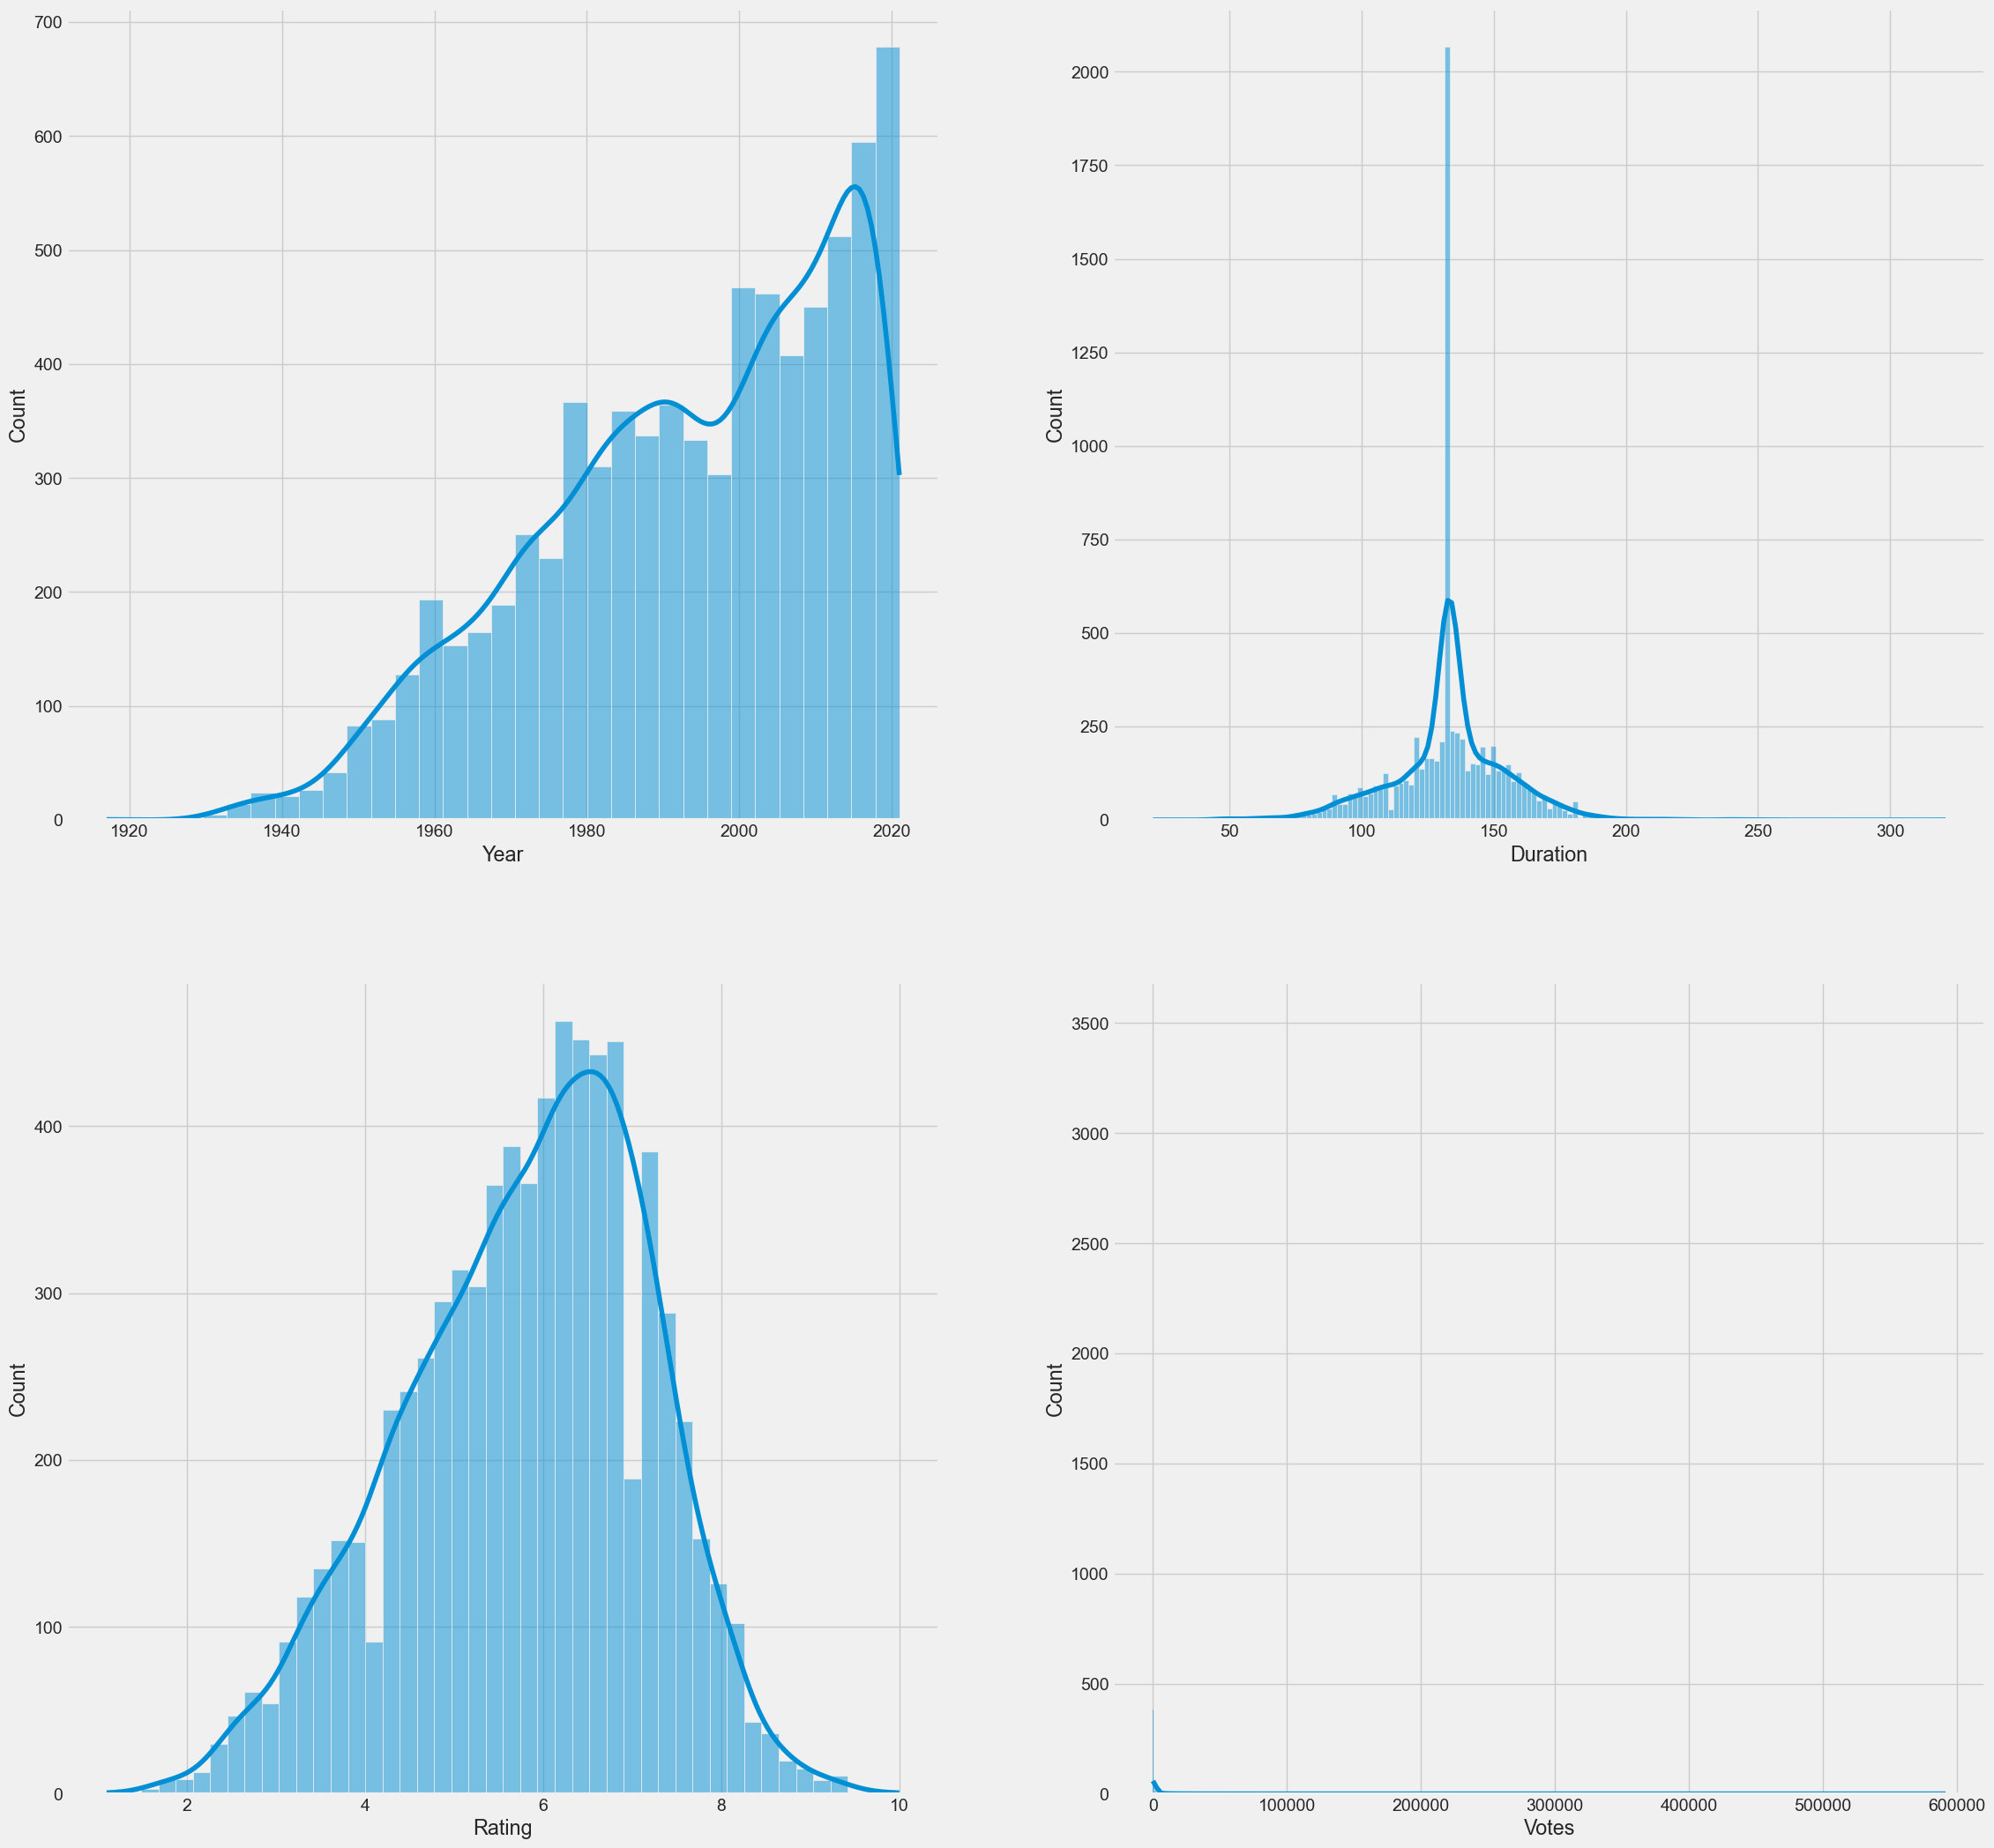

In [45]:
num_columns = list(movie.select_dtypes(include=np.number).columns)
plt.figure(figsize=(25,25))
count=1
for i in num_columns:
    plt.subplot(2,2,count)
    sns.histplot(data=movie, x=i, kde=True)
    count=count+1

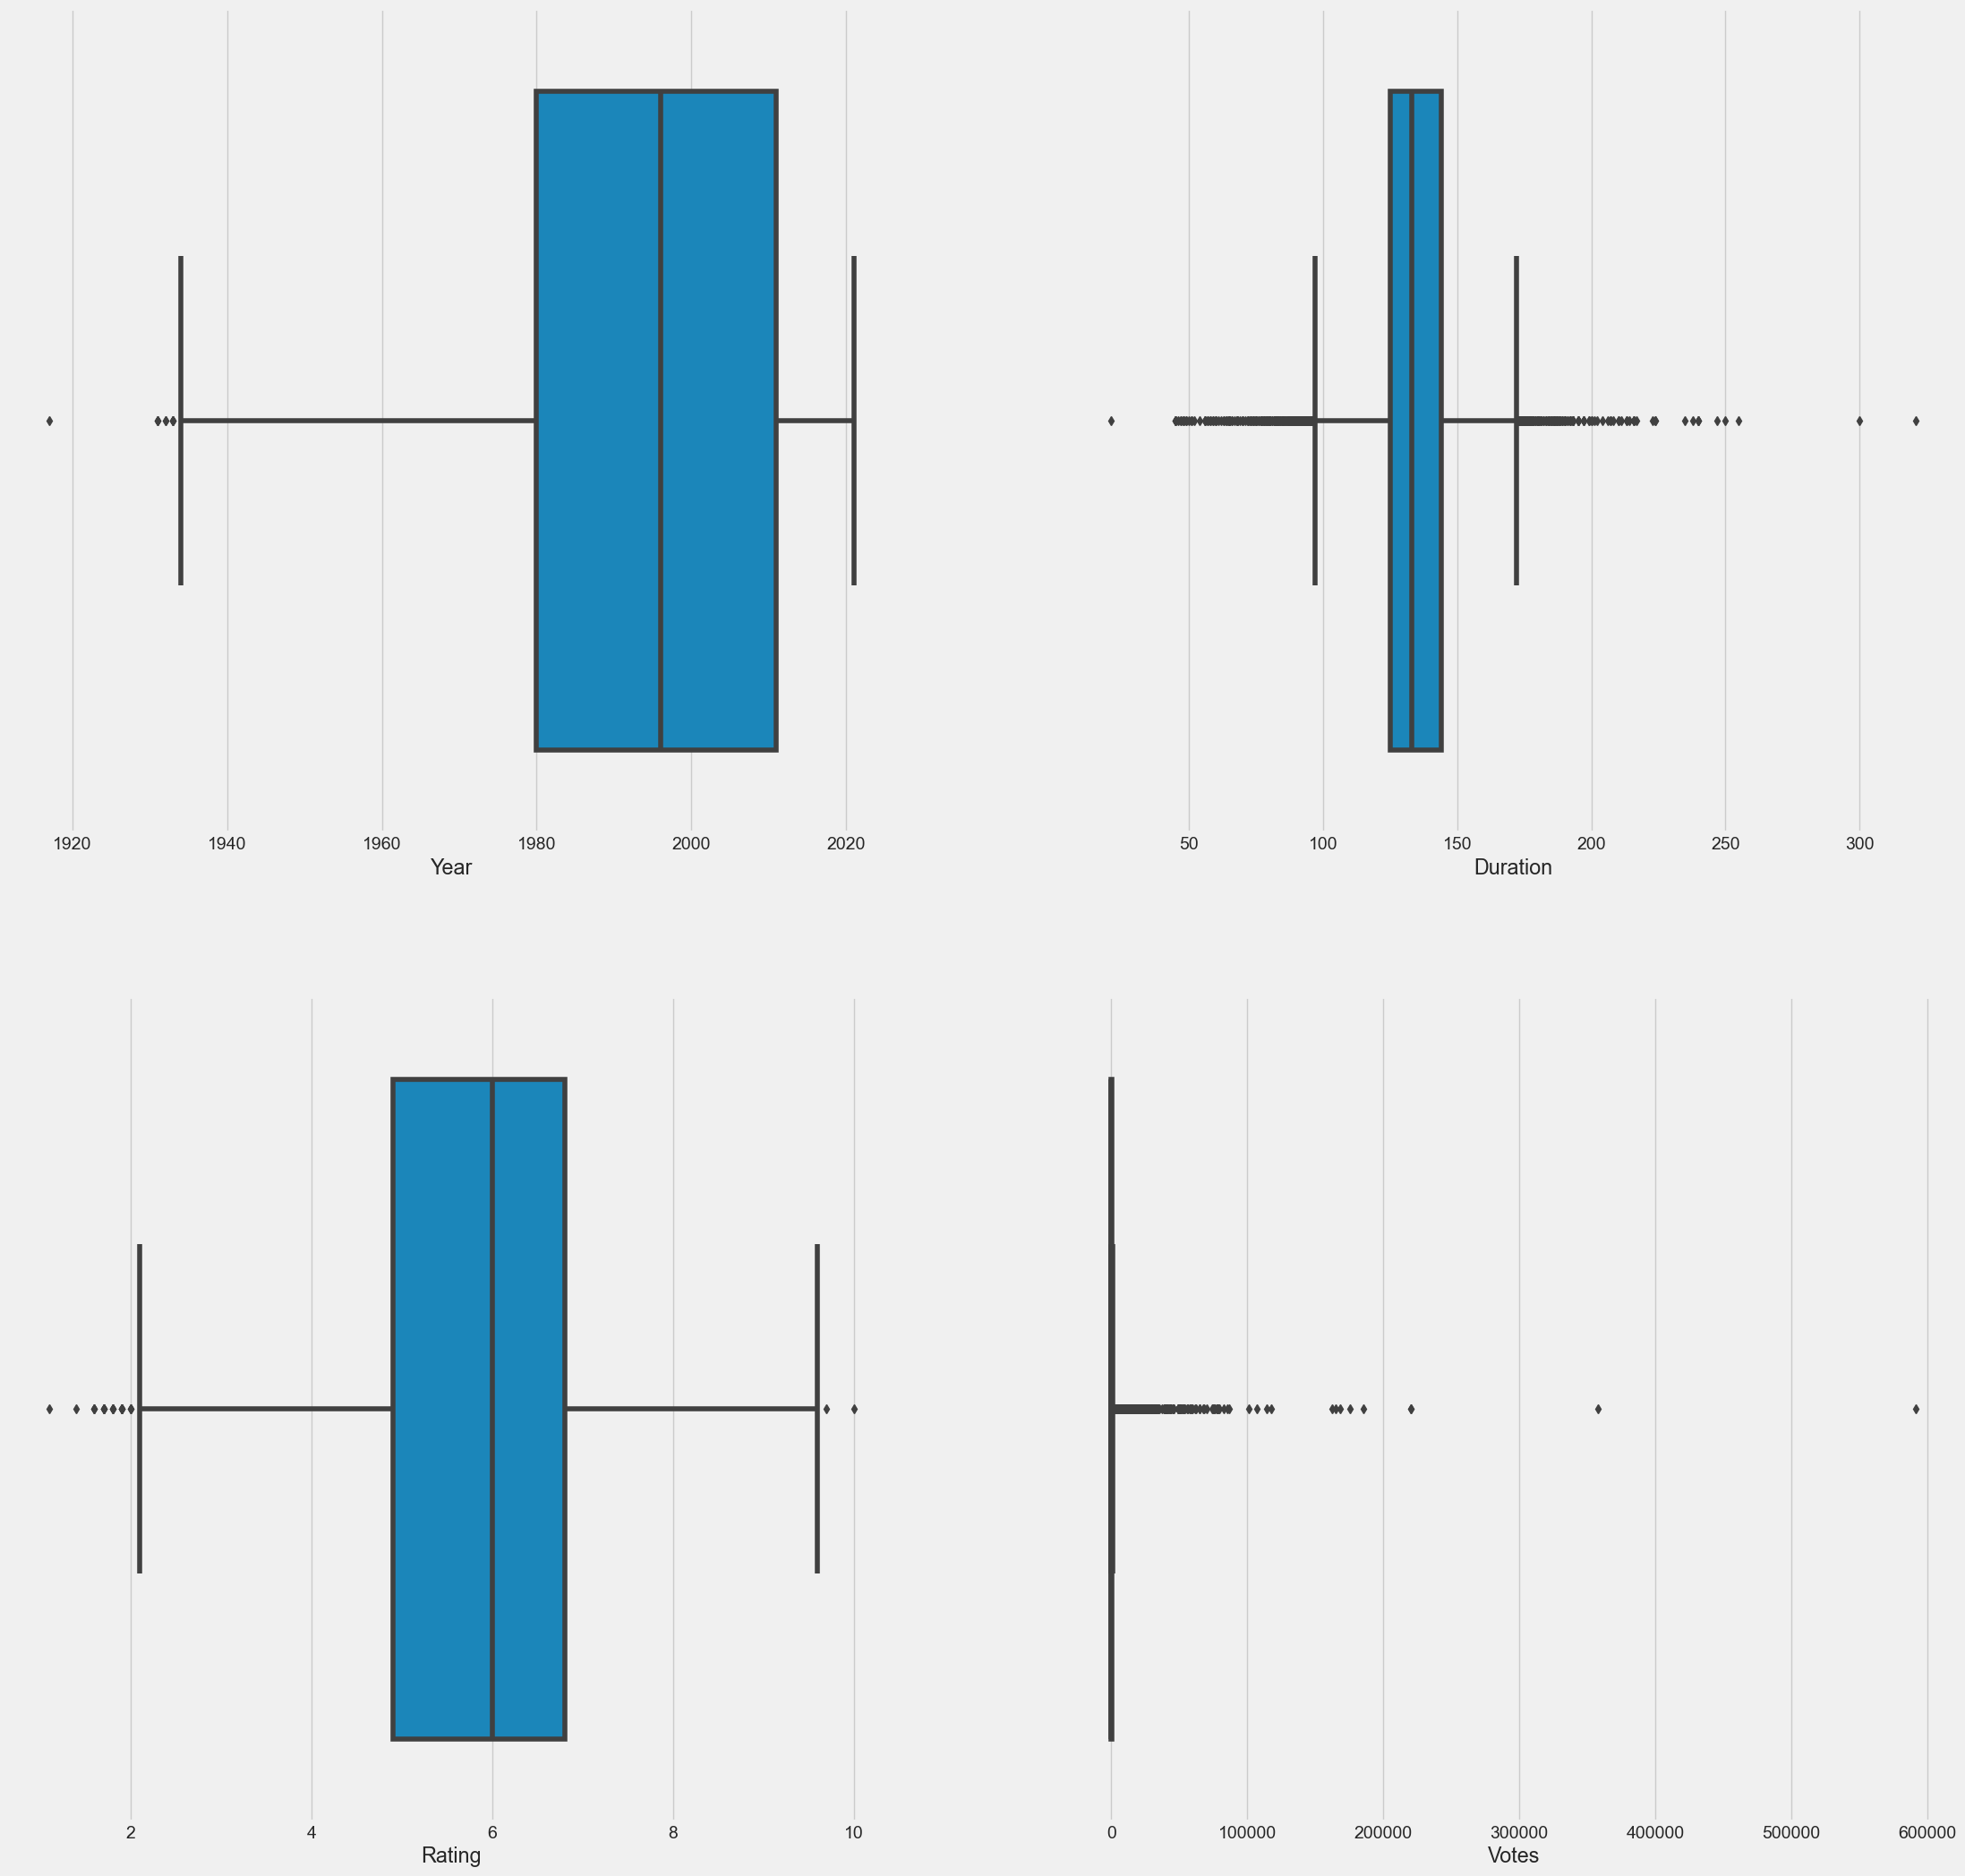

In [46]:
num_columns = list(movie.select_dtypes(include=np.number).columns)
plt.figure(figsize=(25,25))
count=1
for i in num_columns:
    plt.subplot(2,2,count)
    sns.boxplot(data=movie, x=i)
    count=count+1

- The numerical columns does have outliers.
- Hence we will use PowerTransformer to scale the variable.

In [47]:
from sklearn.preprocessing import StandardScaler,PowerTransformer,QuantileTransformer
num_df = movie.select_dtypes(include=np.number)
num_df

Year   Duration    Rating         Votes
1      2019 109.000000  7.000000      8.000000
3      2019 110.000000  4.400000     35.000000
5      1997 147.000000  4.700000    827.000000
6      2005 142.000000  7.400000   1086.000000
8      2012  82.000000  5.600000    326.000000
9      2014 116.000000  4.000000     11.000000
10     2004  96.000000  6.200000     17.000000
11     2016 120.000000  5.900000     59.000000
12     1991 161.000000  6.500000    983.000000
13     2012 166.000000  5.700000    512.000000
15     2018 102.000000  7.400000   6619.000000
18     2010  87.000000  6.300000    162.000000
21     1958 132.000000  7.200000     72.000000
22     2021 105.000000  4.400000     63.000000
25     2017 116.000000  6.600000     26.000000
28     2009 146.000000  7.300000   6329.000000
30     2005 116.000000  7.100000   1002.000000
32     1993 168.000000  5.600000     15.000000
33     2002 158.000000  6.900000   1235.000000
34     2014 126.000000  3.500000     10.000000
35     1946 133.000000  5.000000      8.000000
36     2004  94.000000  4.500000     16.000000
38     2008 138.000000  6.400000   3100.000000
39     2016 120.000000  4.100000   1559.000000
40     2012 124.000000  4.800000   1811.000000
41     2018 144.000000  4.500000   1069.000000
42     1994 157.000000  7.200000   3223.000000
43     2007 136.000000  8.100000   1892.000000
44     2019 107.000000  4.000000     20.000000
45     2017 113.000000  5.500000    106.000000
46     2014 133.000000  7.300000     16.000000
49     2013 133.000000  5.600000     14.000000
50     2012  80.000000  6.800000     21.000000
51     2003 122.000000  5.000000     33.000000
53     2014 149.000000  6.900000  24034.000000
54     2018 148.000000  6.200000  21938.000000
55     1998 149.000000  3.500000    112.000000
58     2017 130.000000  6.100000     94.000000
60     2018 124.000000  6.100000      8.000000
61     1979 121.000000  7.700000     52.000000
62     2019 126.000000  6.100000    361.000000
63     2002 188.000000  5.100000    642.000000
68     2008 133.000000  3.100000     32.000000
69     1974 115.000000  6.900000    194.000000
70     2014 103.000000  5.000000    514.000000
71     2012 114.000000  3.300000    165.000000
73     2003 115.000000  7.800000   2322.000000
74     2019 122.000000  6.900000     35.000000
75     2009 170.000000  8.400000 357889.000000
76     2009 133.000000  5.200000     23.000000
78     2018 100.000000  6.900000    358.000000
79     2015  99.000000  4.300000      6.000000
80     2004 133.000000  5.000000     14.000000
81     2016 133.000000  4.800000     26.000000
82     2015 109.000000  5.800000    238.000000
83     2009 133.000000  4.600000      9.000000
84     2006 140.000000  5.700000   4373.000000
85     1981 122.000000  7.500000    392.000000
86     1974 133.000000  6.700000    128.000000
87     2020 128.000000  5.700000    252.000000
88     2019  93.000000  5.600000     93.000000
89     1985 102.000000  5.600000     80.000000
90     2013 125.000000  3.600000   1128.000000
91     2019 145.000000  6.300000      6.000000
94     2011 121.000000  7.300000   2548.000000
95     2016  75.000000  4.800000      9.000000
96     2009 133.000000  3.900000     14.000000
97     2012 113.000000  7.800000     21.000000
99     2012 111.000000  5.700000     75.000000
100    1974 134.000000  6.500000     36.000000
103    2007 133.000000  6.500000     82.000000
105    2011 110.000000  4.600000     19.000000
109    2014 104.000000  4.200000    171.000000
110    2007  92.000000  6.200000     31.000000
113    2005 136.000000  5.300000    281.000000
114    1988 126.000000  5.000000      7.000000
115    1995 133.000000  3.400000     10.000000
116    2016 115.000000  5.700000    398.000000
117    2006 100.000000  6.200000     10.000000
118    2011 137.000000  6.100000   5640.000000
119    1987 127.000000  4.100000     34.000000
120    2019 120.000000  5.300000    449.000000
121    2019 130.000000  5.300000    249.000000
125    2009 122.000000  5.400000   5459.000000
126    2021 

In [48]:
pt = PowerTransformer()
movie[num_df.columns] = pt.fit_transform(movie[num_df.columns])

In [49]:
movie

Year  Duration                            Genre    Rating  \
1      1.488736 -1.110380                            Drama  0.872417   
3      1.488736 -1.065760                  Comedy, Romance -1.050409   
5      0.035771  0.618829           Comedy, Drama, Musical -0.851230   
6      0.507634  0.387628              Drama, Romance, War  1.205571   
8      0.971579 -2.293680        Horror, Mystery, Thriller -0.217104   
9      1.113662 -0.796963          Action, Crime, Thriller -1.306111   
10     0.445383 -1.685486                            Drama  0.234932   
11     1.260218 -0.616763                           Horror  0.006059   
12    -0.281375  1.271503        Horror, Romance, Thriller  0.469411   
13     0.971579  1.506414           Comedy, Drama, Romance -0.143357   
15     1.411382 -1.421219                    Comedy, Drama  1.205571   
18     0.833836 -2.077887           Comedy, Drama, Romance  0.312473   
21    -1.578609 -0.071602            Crime, Drama, Mystery  1.037814   
22     1.647077 -1.288327                 Horror, Thriller -1.050409   
25     1.335215 -0.796963                   Comedy, Horror  0.548801   
28     0.766552  0.572507           Drama, Horror, Mystery  1.121399   
30     0.507634 -0.796963                            Drama  0.954819   
32    -0.178952  1.600636                            Drama -0.217104   
33     0.323753  1.131005                 Action, Thriller  0.790611   
34     1.113662 -0.345018                           Action -1.609354   
35    -1.905376 -0.025875                   Drama, History -0.645867   
36     0.445383 -1.773111                            Drama -0.984712   
38     0.700306  0.203419         Horror, Mystery, Romance  0.390634   
39     1.260218 -0.616763                  Horror, Mystery -1.243260   
40     0.971579 -0.435789           Drama, Horror, Romance -0.783457   
41     1.411382  0.479985         Horror, Mystery, Romance -0.984712   
42    -0.126524  1.084249           Action, Drama, History  1.037814   
43     0.635080  0.111571               Action, Drama, War  1.810971   
44     1.488736 -1.199460                         Thriller -1.306111   
45     1.335215 -0.931591                           Comedy -0.290205   
46     1.113662 -0.025875                            Drama  1.121399   
49     1.042070 -0.025875                   Comedy, Family -0.217104   
50     0.971579 -2.379532       Adventure, Horror, Mystery  0.709404   
51     0.384095 -0.526371          Action, Crime, Thriller -0.645867   
53     1.113662  0.711596           Comedy, Drama, Romance  0.790611   
54     1.411382  0.665192                   Action, Sci-Fi  0.234932   
55     0.091583  0.711596         Crime, Mystery, Thriller -1.609354   
58     1.335215 -0.162922                           Comedy  0.158013   
60     1.411382 -0.435789                         Thriller  0.158013   
61    -0.832745 -0.571591                   Drama, History  1.461581   
62     1.488736 -0.345018                            Sport  0.158013   
63     0.323753  2.550580        Biography, Drama, History -0.576062   
68     0.700306 -0.025875                            Drama -1.838327   
69    -1.033447 -0.841890                            Drama  0.790611   
70     1.113662 -1.376976                  Horror, Romance -0.645867   
71     0.971579 -0.886766                  Comedy, Romance -1.725387   
73     0.384095 -0.841890                     Crime, Drama  1.548072   
74     1.488736 -0.526371                           Comedy  0.790611   
75     0.766552  1.695002                    Comedy, Drama  2.078954   
76     0.766552 -0.025875                   Drama, Romance -0.505588   
78     1.411382 -1.509536                            Drama  0.790611   
79     1.186372 -1.553609                 Adventure, Drama -1.115403   
80     0.445383 -0.025875                           Horror -0.645867   
81     1.260218 -0.025875                         Thriller -0.783457   
82     1.186372 -1.110380           Action, Drama, 

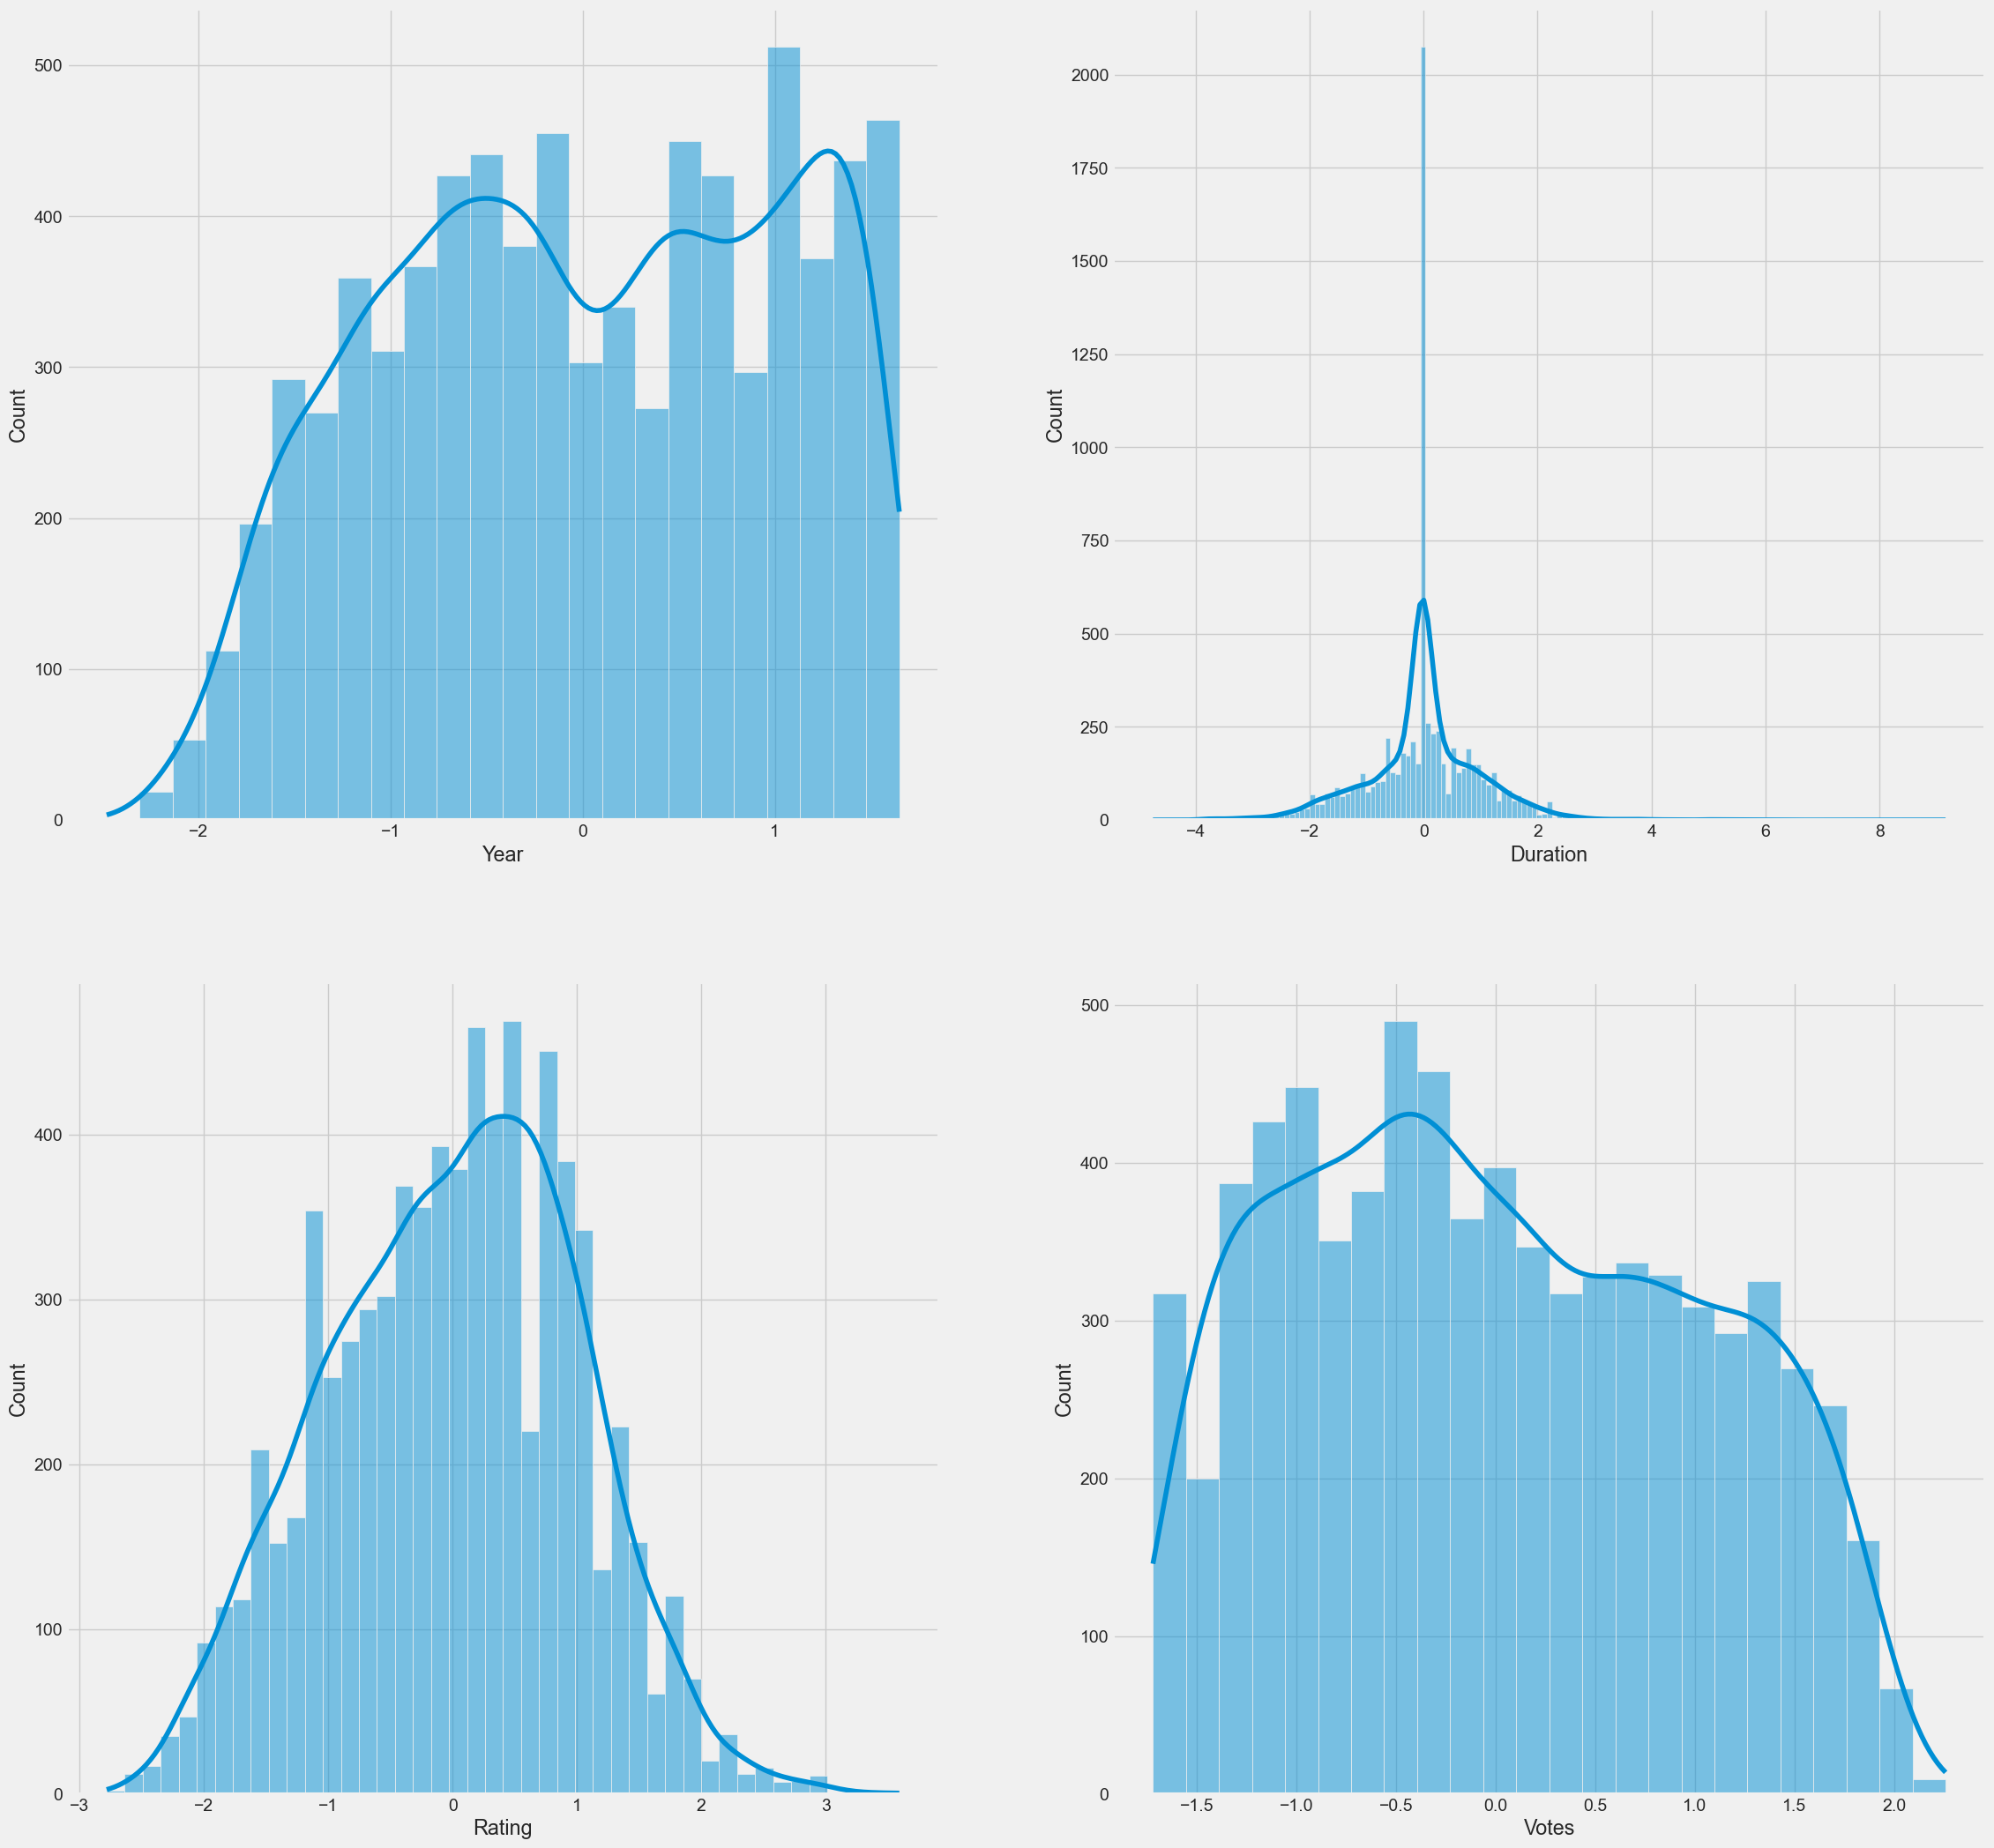

In [50]:
num_columns = list(movie.select_dtypes(include=np.number).columns)
plt.figure(figsize=(25,25))
count=1
for i in num_columns:
    plt.subplot(2,2,count)
    sns.histplot(data=movie, x=i, kde=True)
    count=count+1

**Encoding**

In [51]:
movie.head()

Year  Duration                      Genre    Rating     Votes  \
1 1.488736 -1.110380                      Drama  0.872417 -1.380113   
3 1.488736 -1.065760            Comedy, Romance -1.050409 -0.400949   
5 0.035771  0.618829     Comedy, Drama, Musical -0.851230  1.036573   
6 0.507634  0.387628        Drama, Romance, War  1.205571  1.124418   
8 0.971579 -2.293680  Horror, Mystery, Thriller -0.217104  0.698658   

         Director          Actor 1                 Actor 2          Actor 3  
1   Gaurav Bakshi     Rasika Dugal          Vivek Ghamande    Arvind Jangid  
3      Ovais Khan          Prateik              Ishita Raj  Siddhant Kapoor  
5    Rahul Rawail       Bobby Deol  Aishwarya Rai Bachchan    Shammi Kapoor  
6  Shoojit Sircar  Jimmy Sheirgill          Minissha Lamba   Yashpal Sharma  
8   Allyson Patel        Yash Dave          Muntazir Ahmad     Kiran Bhatia

In [52]:
movie.shape

(7558, 9)

In [53]:
movie.duplicated().sum()

0

In [54]:
movie.select_dtypes("object").columns

Index(['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3'], dtype='object')

- We will convert the categorical columns in to numerical using LableEncoder 


In [55]:
movie.Director

1                            Gaurav Bakshi
3                               Ovais Khan
5                             Rahul Rawail
6                           Shoojit Sircar
8                            Allyson Patel
9                        Biju Bhaskar Nair
10                             Madhu Ambat
11                         Arshad Siddiqui
12                            Partho Ghosh
13                             Rabi Kinagi
15                            Umesh Shukla
18                         Sharat Katariya
21                      Pramod Chakravorty
22                         Ram Gopal Varma
25                               Seshu Kmr
28                         Vikram K. Kumar
30                              Aparna Sen
32                           Vicky Ranawat
33                            Mani Shankar
34                           Mohibul Haque
35                             Mohan Sinha
36                           Sridhar Reddy
38                            Vikram Bhatt
39         

In [66]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
movie['Genre']=label.fit_transform(movie['Genre'])
movie["Director"]=label.fit_transform(movie['Director'])
                                
movie['Actor 1']=label.fit_transform(movie['Actor 1'] )
movie['Actor 2']=label.fit_transform(movie['Actor 2'])
movie['Actor 3']=label.fit_transform(movie['Actor 3'])

In [67]:
movie.head()

Year  Duration  Genre    Rating     Votes  Director  Actor 1  Actor 2  \
1 1.488736 -1.110380    252  0.872417 -1.380113       755     1686     2725   
3 1.488736 -1.065760    205 -1.050409 -0.400949      1637     1500      865   
5 0.035771  0.618829    175 -0.851230  1.036573      1881      481       84   
6 0.507634  0.387628    315  1.205571  1.124418      2486      878     1346   
8 0.971579 -2.293680    351 -0.217104  0.698658       161     2385     1416   

   Actor 3  
1      373  
3     2543  
5     2422  
6     2996  
8     1189

In [68]:
movie.shape

(7558, 9)

In [69]:
#Seperate independent and dependent value:
y=movie["Rating"]
X=movie.drop(columns="Rating")

In [70]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=152)

In [71]:
X_train.shape

(6046, 8)

In [72]:
X_test.shape

(1512, 8)

In [73]:
y_train.shape

(6046,)

In [74]:
y_test.shape

(1512,)

In [75]:
#Linear Regression Model

In [76]:
lin_model = LinearRegression()
lin_model.fit(X_train,y_train)
y_pred = lin_model.predict(X_test)
print('Mean squared error: ',mean_squared_error(y_test,y_pred))
print('Mean absolute error: ',mean_absolute_error(y_test,y_pred))
print('R2 score: ',r2_score(y_test,y_pred))


Mean squared error:  0.9251570794096543
Mean absolute error:  0.7530508990275262
R2 score:  0.09991412138352074


In [77]:
# Let's check the accuracy score after cross validation.


In [78]:
lreg = LinearRegression()
score = cross_val_score(lreg, X, y, cv=5)
# print(score)
print("%0.2f accuracy with a standard deviation of %0.2f" % (score.mean(), score.std()))

0.11 accuracy with a standard deviation of 0.02


**Random Forest Regressor**

In [79]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

model = {
    'RandomForestRegressor': RandomForestRegressor()
   
}


params = {
    'RandomForestRegressor': { 'n_estimators': [75,100,125,150], 'max_features': ['sqrt', 'log2'] }
   
}


In [80]:
X = movie.drop('Rating',axis=1)
y = movie['Rating']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=122)
for model_name, model in model.items():
    model_to_tune = GridSearchCV(model, params[model_name], cv=5)
    model_to_tune.fit(X_train, y_train)
    
    print(f"Best parameters for {model_name}: {model_to_tune.best_params_}")
    print(f"Best score for {model_name}: {model_to_tune.best_score_}")

Best parameters for RandomForestRegressor: {'max_features': 'log2', 'n_estimators': 125}
Best score for RandomForestRegressor: 0.35286069284595406


**DecisionTreeRegressor**

In [81]:
X = movie.drop('Rating',axis=1)
y = movie['Rating']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth=7,random_state=42)
rf = LinearRegression()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_train)
y_pred_test = rf.predict(X_test)
# print('Mean squared error: ',mean_squared_error(y_test,y_pred))
# print('Mean absolute error: ',mean_absolute_error(y_test,y_pred))
print('R2 scorefor training data: ',r2_score(y_train,y_pred))
print('R2 score for testing data: ',r2_score(y_test,y_pred_test))

R2 scorefor training data:  0.1189162567197154
R2 score for testing data:  0.08579588325929888
